#### **Import Libs**

In [1]:
import joblib
import pandas as pd

from scipy.stats import ks_2samp
import sys

from plotly.subplots import make_subplots
import plotly.graph_objects as go

from yellowbrick.classifier import ROCAUC, ClassPredictionError, PrecisionRecallCurve, ConfusionMatrix, ClassificationReport


#### **plot_target_vs_score**

In [2]:
def plot_target_vs_score(target, scores, quantiles, lower_limit=None):
    eval_df = pd.DataFrame(zip(target, scores), columns=['TARGET', 'SCORE']).sort_values(by='SCORE')

    quantile = pd.qcut(eval_df['SCORE'], quantiles, labels=range(1, quantiles+1))
    eval_df['QUANTILE'] = quantile
    if lower_limit:
        eval_df = eval_df.loc[eval_df['QUANTILE'] > lower_limit]

    chart_df = pd.DataFrame(zip(
      eval_df.groupby('QUANTILE')['TARGET'].mean(), eval_df.groupby('QUANTILE')['TARGET'].size()/eval_df.shape[0]
      ), columns=['TAXA_DE_MAUS', 'POPULACAO'])

    fig = make_subplots(specs=[[{"secondary_y": True}]])

    chart_df = chart_df.dropna()
    # Add traces
    fig.add_trace(
      go.Bar(x=chart_df.index.to_list(), y=chart_df.POPULACAO, name="Representatividade (%)", marker_color='rgba(0, 0, 87, .8)'),
      secondary_y=False,
    )

    fig.add_trace(
      go.Scatter(x=chart_df.index.to_list(), y=chart_df.TAXA_DE_MAUS, name="Média do alvo ponderada pela exposição (%)", marker_color='rgb(216, 125, 77)'),
      secondary_y=True,
      #labels=dict(x="Decil", y="Representatividade (%)")
    )

    fig.update_xaxes(title_text='Decil da população')
    fig.update_yaxes(title_text='Representatividade (%)', secondary_y=False)
    fig.update_yaxes(title_text='Média do alvo ponderada pela exposição (%)', secondary_y=True)
    fig.update_layout(    
      width=1000,height=500,
      legend=dict(orientation="h", xanchor='center', x=0.5, y=-0.2))

    fig.show()


In [3]:
model = joblib.load('./raw_models/decision_tree_pt_1.pkl')

#### **Loading data**

In [4]:
# Carregar dados de treinamento
df_train = pd.read_csv('../databases/training.csv')
X_train, y_train = df_train.drop(['IND_BOM_1_1'], axis=1), df_train['IND_BOM_1_1']

In [5]:
# Carregar dados de validação
df_valid = pd.read_csv('../databases/validation.csv')
X_val, y_val = df_valid.drop(['IND_BOM_1_1'], axis=1), df_valid['IND_BOM_1_1']

In [6]:
# Carregar dados de teste
df_test = pd.read_csv('../databases/test.csv')
X_test, y_test = df_test.drop(['IND_BOM_1_1'], axis=1), df_test['IND_BOM_1_1']

#### **Model Evaluation**

In [7]:
y_pred = model.predict_proba(X_test)[:, 1]

d:\MiniConda\envs\DataScience\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


##### Target vs Score analysis

In [8]:
plot_target_vs_score(y_test, y_pred, quantiles=10)

##### KS and AUC analysis

In [9]:
ks_2samp(y_pred, y_test)

KstestResult(statistic=0.6547981469225679, pvalue=0.0, statistic_location=0.979296066252588, statistic_sign=1)

d:\MiniConda\envs\DataScience\Lib\site-packages\sklearn\base.py:432: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names

d:\MiniConda\envs\DataScience\Lib\site-packages\sklearn\base.py:432: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names



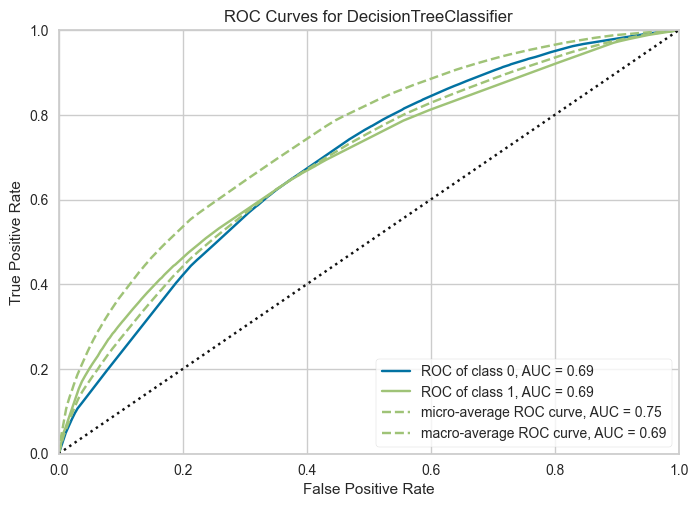

<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [10]:
visualizer = ROCAUC(model, classes=[0, 1])

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

visualizer.show()   

##### Precision-Recall curvers

d:\MiniConda\envs\DataScience\Lib\site-packages\sklearn\base.py:432: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names

d:\MiniConda\envs\DataScience\Lib\site-packages\sklearn\base.py:432: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names



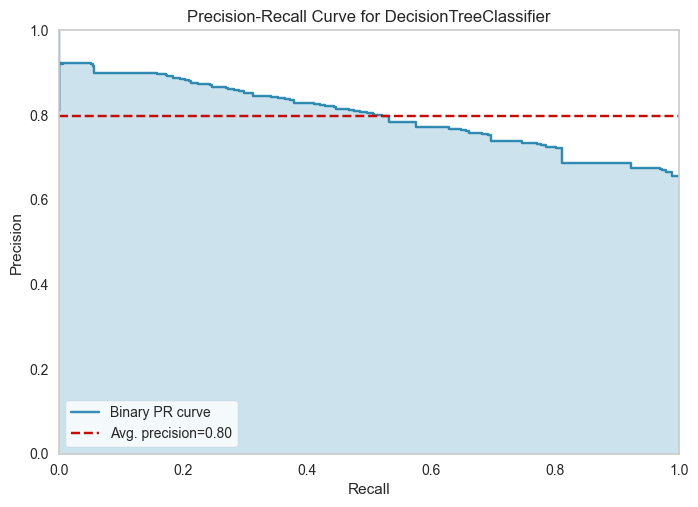

<Axes: title={'center': 'Precision-Recall Curve for DecisionTreeClassifier'}, xlabel='Recall', ylabel='Precision'>

In [11]:
visualizer = PrecisionRecallCurve(model, classes=[0, 1])

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

visualizer.show()

##### Confusion matrix

d:\MiniConda\envs\DataScience\Lib\site-packages\sklearn\base.py:432: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names

d:\MiniConda\envs\DataScience\Lib\site-packages\sklearn\base.py:432: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names



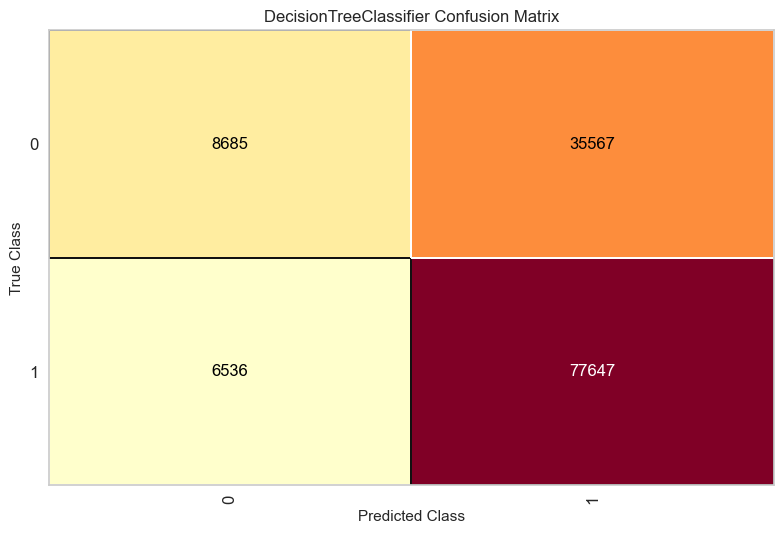

<Axes: title={'center': 'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [12]:
visualizer = ConfusionMatrix(model, classes=[0, 1])

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

visualizer.show()

##### Class prediction error

d:\MiniConda\envs\DataScience\Lib\site-packages\sklearn\base.py:432: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names

d:\MiniConda\envs\DataScience\Lib\site-packages\sklearn\base.py:432: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names



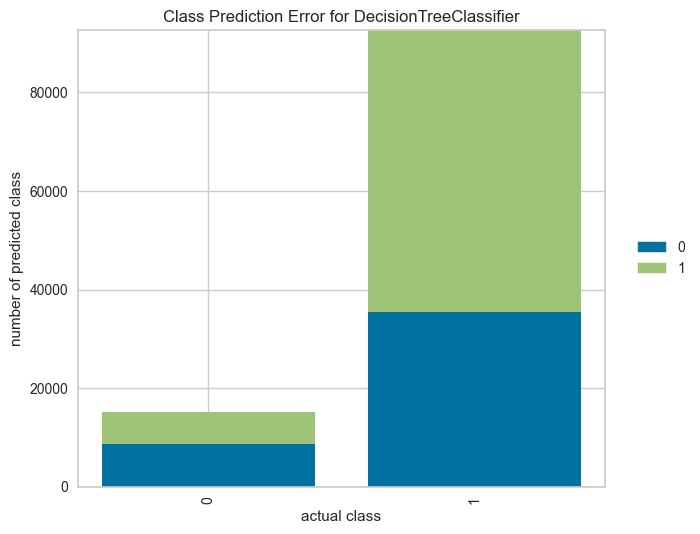

<Axes: title={'center': 'Class Prediction Error for DecisionTreeClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [13]:
visualizer = ClassPredictionError(model, classes=[0, 1])

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()   

##### Classification Report

d:\MiniConda\envs\DataScience\Lib\site-packages\sklearn\base.py:432: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names

d:\MiniConda\envs\DataScience\Lib\site-packages\sklearn\base.py:432: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names



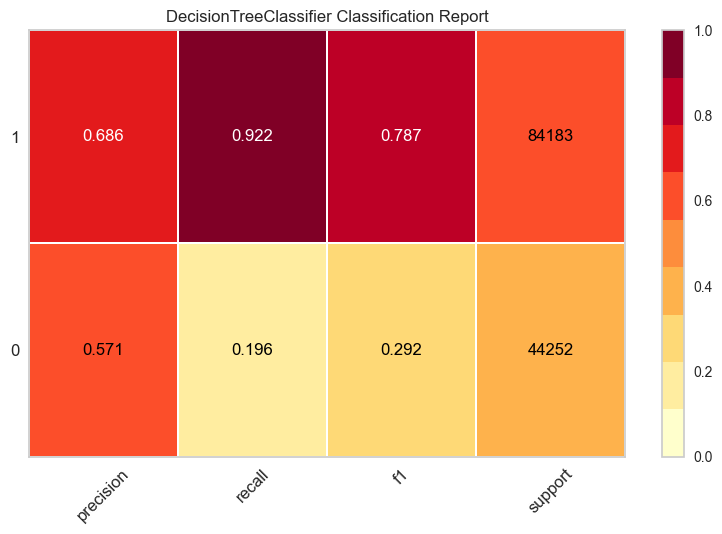

<Axes: title={'center': 'DecisionTreeClassifier Classification Report'}>

In [14]:
visualizer = ClassificationReport(model, classes=[0, 1], support=True)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

visualizer.show()  